In [1]:
import numpy as np
import pandas as pd
import os 
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
import cv2
import pathlib
import random

In [2]:
dataset_path = pathlib.Path('D:\(CSE)project_dataset\Face Mask Dataset')
Test_path = 'D:\(CSE)project_dataset\Face Mask Dataset/Test'
Train_path = 'D:\(CSE)project_dataset\Face Mask Dataset/Train'
Val_path = 'D:\(CSE)project_dataset\Face Mask Dataset/Validation'

images=os.listdir(Train_path)
images

['WithMask', 'WithoutMask']

Text(0.5, 1.0, 'person with mask')

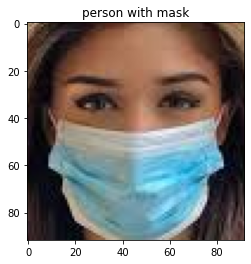

In [3]:
Mask_img =  mpimg.imread('D:\(CSE)project_dataset\Face Mask Dataset/Train/WithMask/148.png')
plt.imshow(Mask_img)
plt.title("person with mask")

Text(0.5, 1.0, 'person without mask')

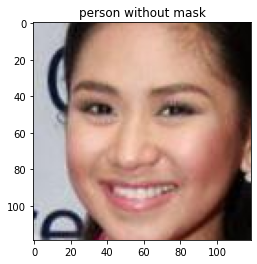

In [4]:
Mask_img =  mpimg.imread('D:\(CSE)project_dataset\Face Mask Dataset/Train/WithoutMask/138.png')
plt.imshow(Mask_img)
plt.title("person without mask")

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(Train_path,
                                                 target_size = (128, 128),
                                                 interpolation="nearest",
                                                 class_mode='binary',
                                                 classes=["WithoutMask","WithMask"])

validation_set = val_datagen.flow_from_directory(Val_path,
                                                 target_size=(128, 128),
                                                 interpolation="nearest",
                                                 class_mode='binary',
                                                 classes=["WithoutMask","WithMask"])

test_set = test_datagen.flow_from_directory(Test_path,
                                            target_size = (128, 128),
                                            interpolation="nearest",
                                            class_mode='binary',
                                            classes=["WithoutMask","WithMask"])

interpolation="nearest",
classes=["without_mask","with_mask"]

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [6]:
def GetXY(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)

In [7]:
trainX,trainY = GetXY(training_set)
valX,valY = GetXY(validation_set)
testX,testY = GetXY(test_set)

In [8]:
input_data = Input(shape=(128, 128, 3))
#Convolution
x = Conv2D(32, (3, 3), activation="relu")(input_data)
#Pooling
x = MaxPooling2D(pool_size = (4, 4), strides=(4, 4))(x)
#Dropout
x = Dropout(0.25)(x)
# 2nd Convolution
x = Conv2D(32, (3, 3), activation="relu")(x)
# 2nd Pooling layer
x = MaxPooling2D(pool_size = (2, 2))(x)
#Dropout
x = Dropout(0.3)(x)
#3rd Convolution
x = Conv2D(32, (3, 3), activation='relu')(x)
#3rd Pooling Layer
x = MaxPooling2D(pool_size=(2, 2))(x)
#Dropout
x = Dropout(0.3)(x)
# Flatten the layer
x = Flatten()(x)
# Fully Connected Layers
x = Dense(128, activation = 'relu')(x)
output = Dense(1, activation = 'sigmoid')(x)
cnn = Model(inputs=input_data, outputs=output)
# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0     

In [10]:
callbacks = [ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)]
history = cnn.fit(trainX, trainY,
                         epochs = 5,
                         verbose = 1,
                         batch_size=32,
                         validation_data = (valX, valY),
                         callbacks=callbacks)

Epoch 1/5
313/313 [==============================] - 161s 500ms/step - loss: 0.2861 - accuracy: 0.8745 - val_loss: 0.1025 - val_accuracy: 0.9775
Epoch 2/5
313/313 [==============================] - 141s 450ms/step - loss: 0.0934 - accuracy: 0.9664 - val_loss: 0.0835 - val_accuracy: 0.9850
Epoch 3/5
313/313 [==============================] - 140s 446ms/step - loss: 0.0704 - accuracy: 0.9755 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 4/5
313/313 [==============================] - 139s 445ms/step - loss: 0.0482 - accuracy: 0.9825 - val_loss: 0.0580 - val_accuracy: 0.9800
Epoch 5/5
313/313 [==============================] - 137s 437ms/step - loss: 0.0443 - accuracy: 0.9845 - val_loss: 0.0232 - val_accuracy: 0.9950


In [11]:
cnn.evaluate(testX, testY, verbose=2)
predict = (cnn.predict(testX) > 0.5).astype("int32")
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))

31/31 - 5s - loss: 0.0374 - accuracy: 0.9899
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       509
         1.0       0.99      0.99      0.99       483

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992

[[505   4]
 [  6 477]]


In [12]:
print('Accuracy:', accuracy_score(testY, predict))

Accuracy: 0.9899193548387096


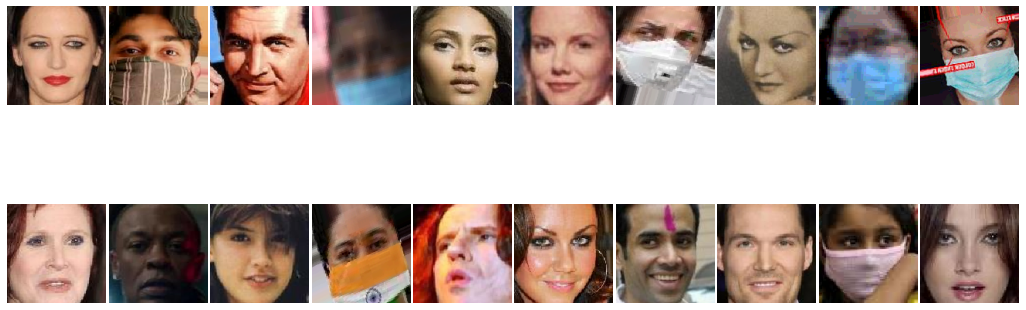

In [13]:
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(6, 10, i+1)
    number = np.random.randint(testX[testY == predict.ravel()].shape[0])
    plt.imshow(testX[testY == predict.ravel()][number])
    plt.axis("off")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

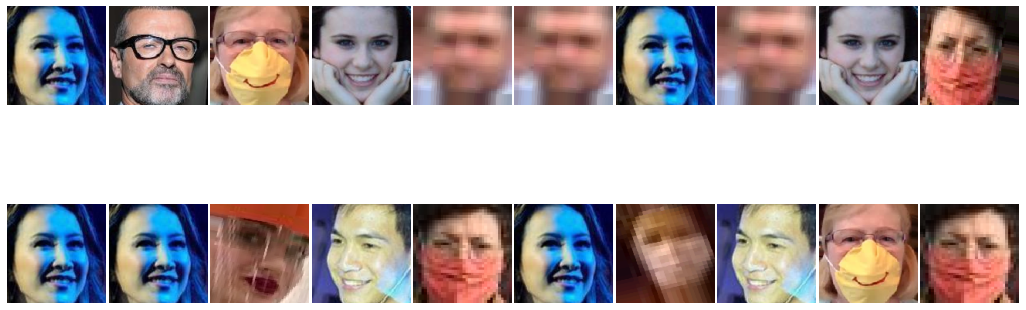

In [14]:
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(6, 10, i+1)
    number = np.random.randint(testX[testY != predict.ravel()].shape[0])
    plt.imshow(testX[testY != predict.ravel()][number])
    plt.axis("off")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [15]:
def build_model(resnet):
    input_data = Input(shape=(128, 128, 3))
    x = resnet(input_data)
    x = GlobalMaxPooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128,activation='relu')(x) 
    output = Dense(1, activation='sigmoid')(x)
    
    resnet_model = Model(inputs=input_data, outputs=output)
    
    resnet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return resnet_model

In [16]:
resnet = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (128, 128, 3))
resnet.trainable = False
model = build_model(resnet)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129 

In [17]:
callbacks = [ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)]
history = model.fit(trainX, trainY,
                         epochs = 5,
                         verbose = 1,
                         batch_size=32,
                         validation_data = (valX, valY),
                         callbacks=callbacks)

Epoch 1/5
313/313 [==============================] - 840s 3s/step - loss: 0.4364 - accuracy: 0.7923 - val_loss: 0.3585 - val_accuracy: 0.8375
Epoch 2/5
313/313 [==============================] - 818s 3s/step - loss: 0.3063 - accuracy: 0.8715 - val_loss: 0.2481 - val_accuracy: 0.8925
Epoch 3/5
313/313 [==============================] - 807s 3s/step - loss: 0.2819 - accuracy: 0.8782 - val_loss: 0.2390 - val_accuracy: 0.8988
Epoch 4/5
313/313 [==============================] - 812s 3s/step - loss: 0.2579 - accuracy: 0.8897 - val_loss: 0.2406 - val_accuracy: 0.9025
Epoch 5/5
313/313 [==============================] - 804s 3s/step - loss: 0.2417 - accuracy: 0.8966 - val_loss: 0.2282 - val_accuracy: 0.9125


In [18]:
model.evaluate(testX, testY, verbose=2)
predict = (model.predict(testX) > 0.5).astype("int32")
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))

31/31 - 65s - loss: 0.1863 - accuracy: 0.9405
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       509
         1.0       0.93      0.95      0.94       483

    accuracy                           0.94       992
   macro avg       0.94      0.94      0.94       992
weighted avg       0.94      0.94      0.94       992

[[474  35]
 [ 24 459]]


In [19]:
print('Accuracy:', accuracy_score(testY, predict))

Accuracy: 0.9405241935483871


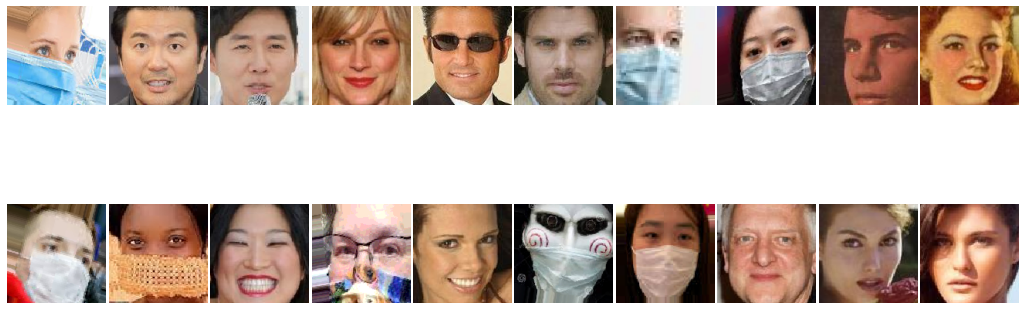

In [20]:
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(6, 10, i+1)
    number = np.random.randint(testX[testY == predict.ravel()].shape[0])
    plt.imshow(testX[testY == predict.ravel()][number])
    plt.axis("off")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

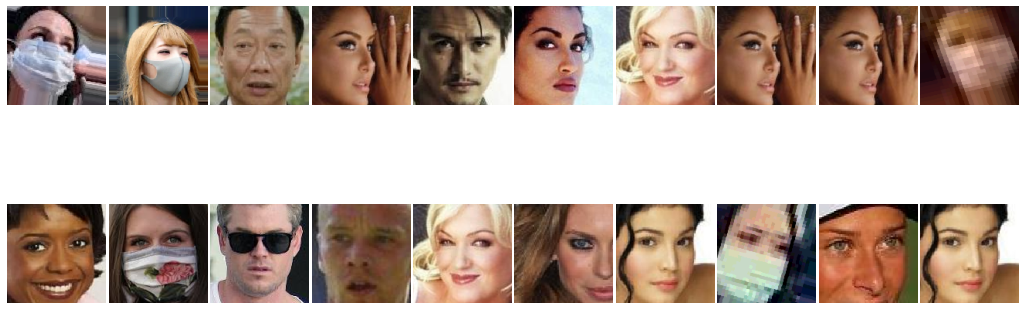

In [21]:
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(6, 10, i+1)
    number = np.random.randint(testX[testY != predict.ravel()].shape[0])
    plt.imshow(testX[testY != predict.ravel()][number])
    plt.axis("off")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()